**Project : Predicting Credit Card** **Eligibility**

The aim of this project is to develop a predictive model that can accurately determine an individual's eligibility for a credit card based on a set of relevant features. By utilizing machine learning techniques, we aim to create a model that can generalize from historical data and make predictions on new data instances.


**features** **:**
Ind_ID,	GENDER,	Car_Owner,	Propert_Owner,	CHILDREN,	Annual_income	Type_Income,	EDUCATION,	Marital_status,	Housing_type,	Birthday_count	Employed_days,	Mobile_phone,	Work_Phone,	Phone,	EMAIL_ID,	Type_Occupation,	Family_Members

### **Data Collection and Exploration:**
Collect the dataset containing various attributes of individuals, including gender, car ownership, property ownership, children, annual income, type of income, education, marital status, housing type, birthday count, employment duration, mobile and work phone usage, type of occupation, and family members. Explore the dataset to understand its structure, patterns, and any potential issues.

### **Data Preprocessing:**
Cleanse and preprocess the data by addressing missing values, handling categorical variables, and normalizing numerical features. Create a synthetic target variable that signifies credit card eligibility based on a predefined income threshold.

### **Model Selection and Evaluation:**
Select four different machine learning models: Random Forest, Gradient Boosting, Logistic Regression, and Support Vector Machine. Train each model on a training dataset, tune hyperparameters if necessary, and evaluate their performance using multiple metrics including accuracy, precision, recall, and F1-score on a test dataset.

### **Selecting the Best Model:**
Choose the model that demonstrates the highest performance based on the selected evaluation metric. The best model should offer the most accurate and reliable predictions for credit card eligibility.

Model Deployment and Predictions:
Deploy the selected best model on the entire dataset to generate predictions for credit card eligibility. Add the model's predictions as a new column to the dataset.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pz

## **Data Preprocessing**
**Data Loading**                                                        
 The dataset was loaded into the environment for analysis and modeling purposes.

In [5]:
# Load the dataset
data = pd.read_csv("Credit_card.csv")

credit_approval= data.copy()

# Display the first few rows of the dataset
credit_approval.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
credit_approval.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [ ]:
credit_approval.shape

(1548, 18)

In [ ]:
credit_approval.size

27864

In [ ]:
# Check basic statistics and information about the dataset

credit_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
credit_approval.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [ ]:
# check for missing values
credit_approval.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
credit_approval.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [ ]:
credit_approval.GENDER.value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
credit_approval.EDUCATION.value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [ ]:
credit_approval.Marital_status.value_counts()


Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [ ]:
credit_approval.Type_Income.value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [ ]:
credit_approval.Type_Occupation.value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

<Axes: >

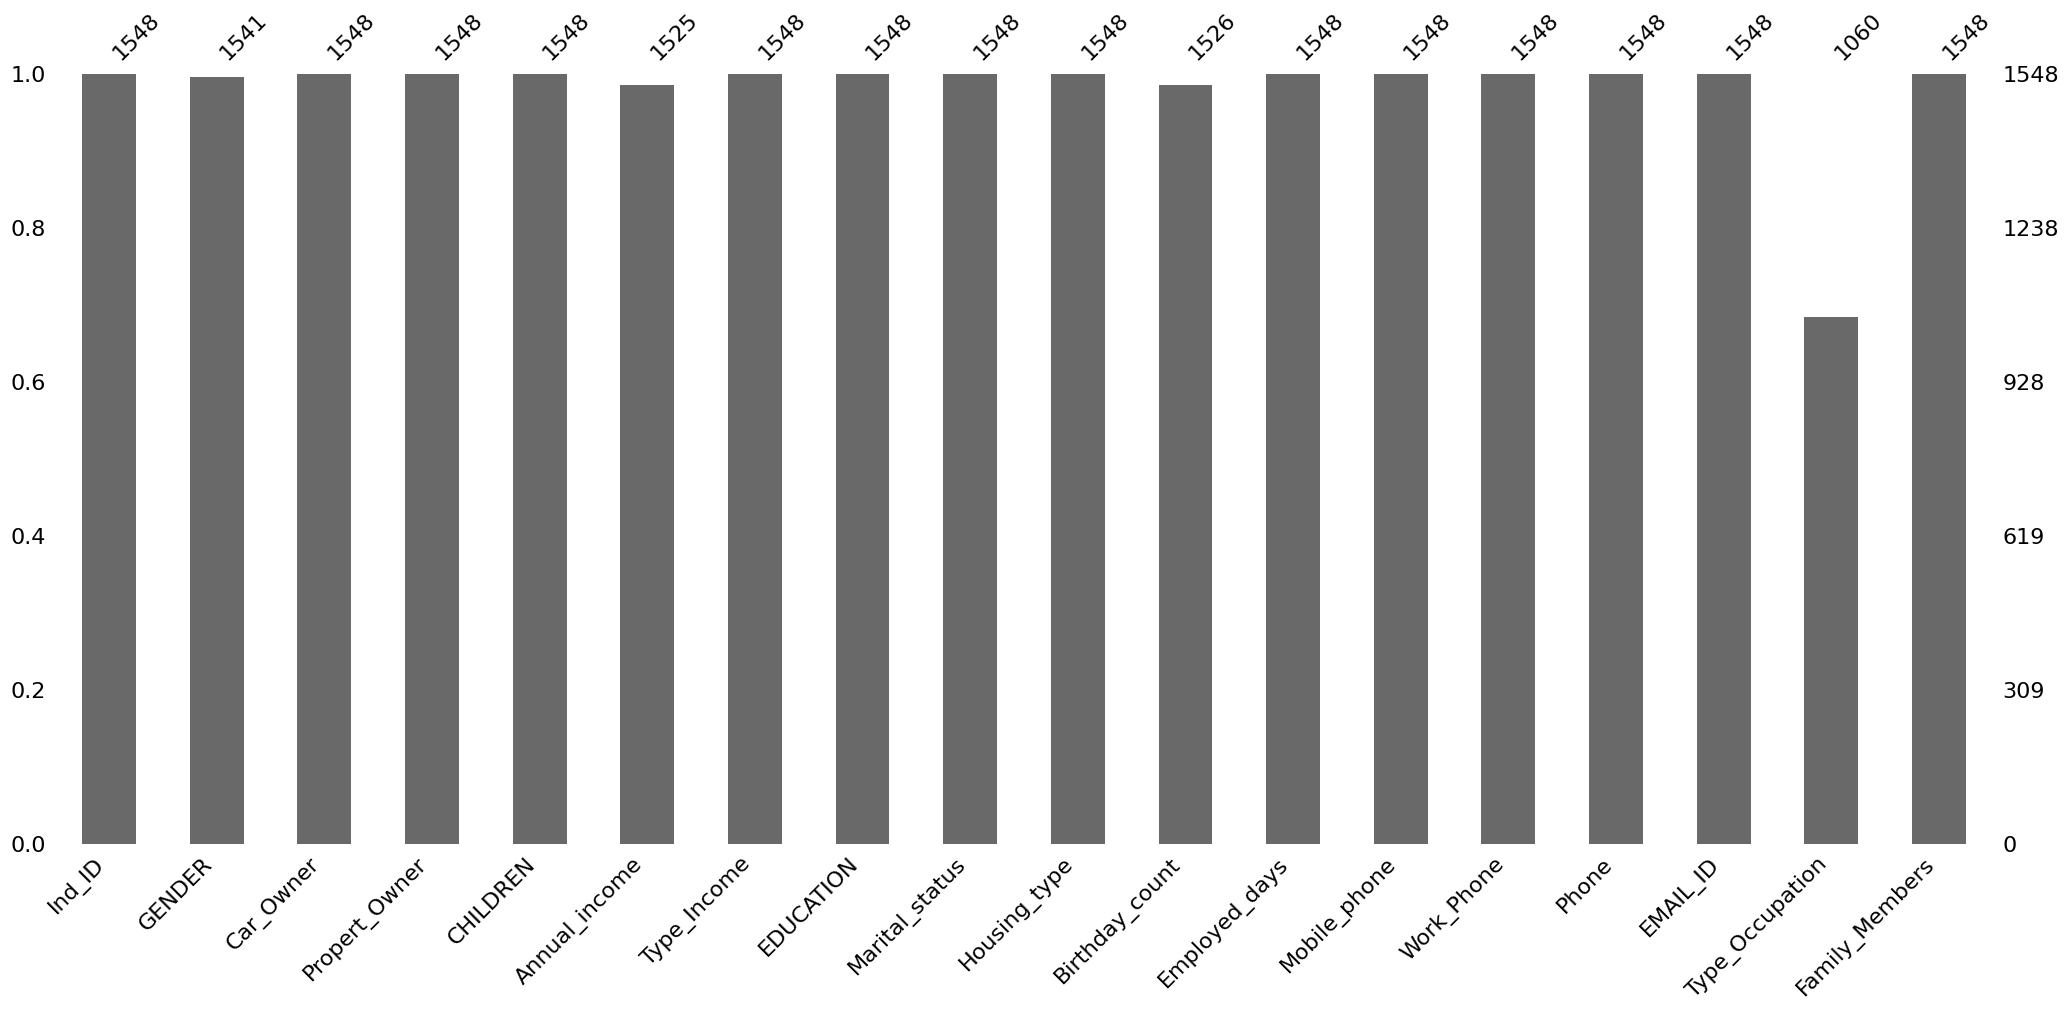

In [ ]:
import missingno as msno
msno.bar(credit_approval)

<Axes: >

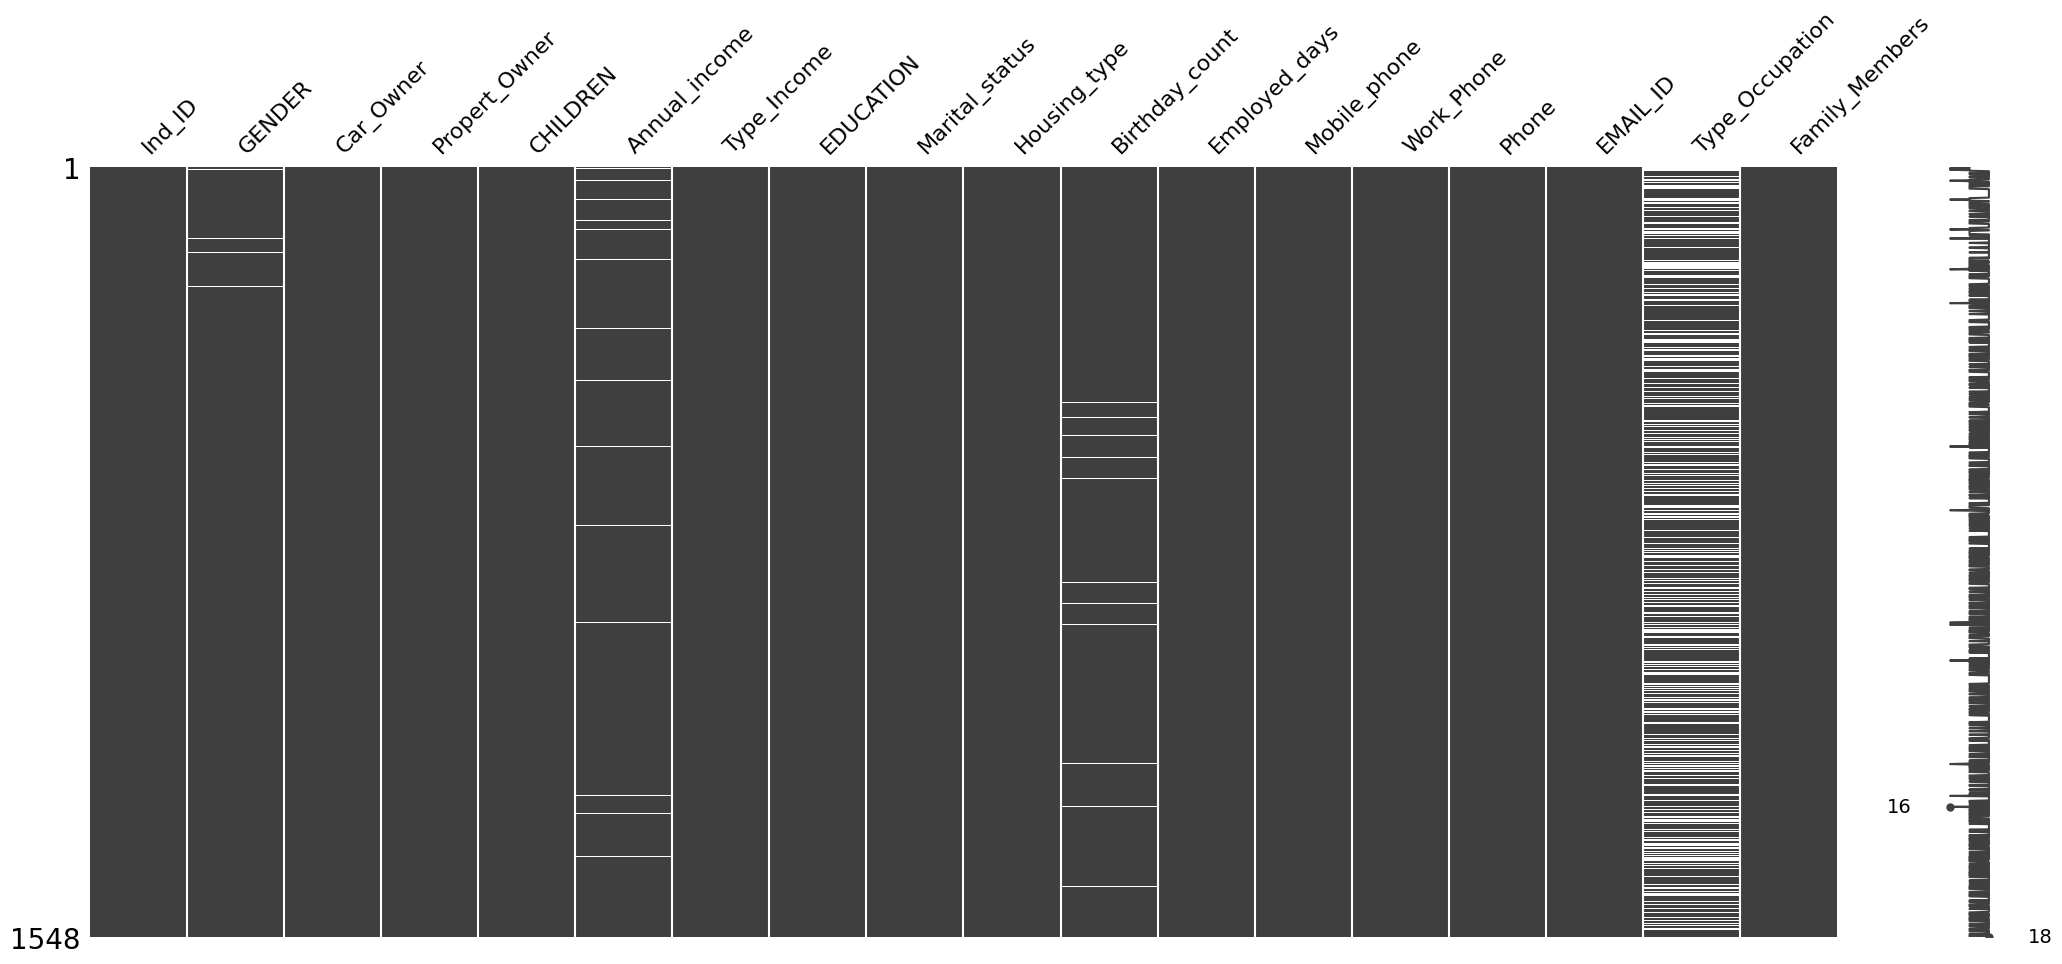

In [ ]:
msno.matrix(credit_approval)

<ipython-input-38-7bc5ca44b610>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = credit_approval.corr()


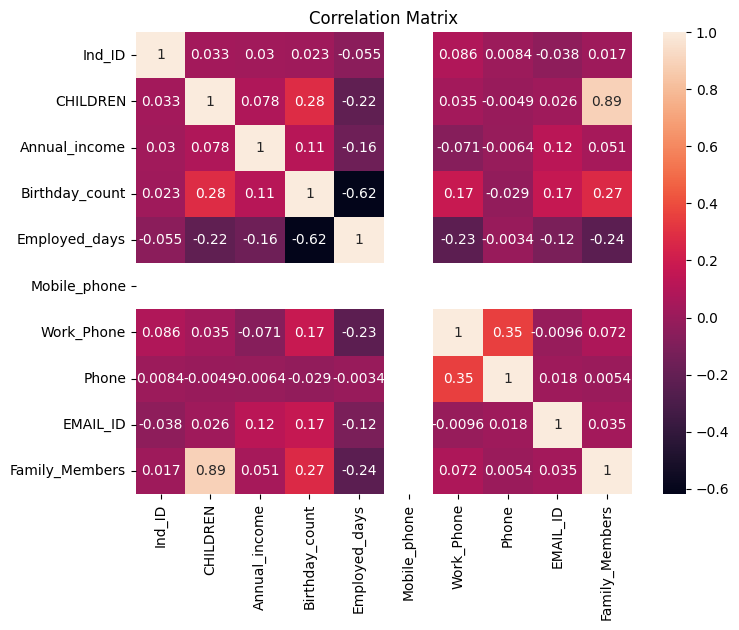

In [ ]:
correlation_matrix = credit_approval.corr()
plt.figure(figsize=(8, 6))
sns.heatmap( correlation_matrix, annot = True )
plt.title('Correlation Matrix')
plt.show()

# **Data Cleaning**
Data cleaning involved removing duplicate records, correcting inconsistencies, and ensuring data quality.

In [6]:
# Drop the 'Ind_ID' and 'EMAIL_ID' and 'phone' columns

columns_to_drop = ["Ind_ID","EMAIL_ID", "Phone"]
credit_approval.drop(columns= columns_to_drop,inplace=True)

print(credit_approval.head())

  GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0      M         Y             Y         0       180000.0   
1      F         Y             N         0       315000.0   
2      F         Y             N         0       315000.0   
3      F         Y             N         0            NaN   
4      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone Type_Occupation  \
0        -18772.0         365243             1           0             NaN   
1 

In [7]:
credit_approval.rename(columns={"GENDER": "Gender", "EDUCATION":"Education", "CHILDREN":"Children"},inplace=True)

In [8]:
# Create a mapping dictionary
education_mapping = {
    "Secondary / secondary special": "Secondary Education",
    "Higher education": "Higher Education",
    "Incomplete higher": "Incomplete Education",
    "Lower secondary": "Secondary Education",
    "Academic degree": "Higher Education"
}

# Apply the mapping to the EDUCATION column
credit_approval['Education'] = credit_approval['Education'].map(education_mapping)


In [9]:
marital_status_mapping = {
    'Married': 'Married',
    'Single / not married': 'Single',
    'Civil marriage': 'Civil Marriage',
    'Separated': 'Separated',
    'Widow': 'Widow'
}

credit_approval['Marital_status'] = credit_approval['Marital_status'].map(marital_status_mapping)


In [10]:
# Remove duplicate rows
credit_approval.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", len(credit_approval))

Number of rows after removing duplicates: 1376


In [ ]:
credit_approval.duplicated().sum()

0

# **Handling Missing Values**
Missing values in the dataset were identified and treated using appropriate methods, such as imputation or removal.

In [11]:
# Handle missing values
credit_approval['Annual_income'].fillna(credit_approval['Annual_income'].median(), inplace=True)
credit_approval['Birthday_count'].fillna(credit_approval['Birthday_count'].median(), inplace=True)
credit_approval['Type_Occupation'].fillna(credit_approval['Type_Occupation'].mode()[0], inplace=True)
credit_approval['Gender'].fillna(credit_approval['Gender'].mode()[0],inplace=True)



In [ ]:
credit_approval.isna().sum()

Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Type_Occupation    0
Family_Members     0
dtype: int64

In [ ]:
credit_approval.head()

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Type_Occupation,Family_Members
0,M,Y,Y,0,180000.0,Pensioner,Higher Education,Married,House / apartment,-18772.0,365243,1,0,Laborers,2
1,F,Y,N,0,315000.0,Commercial associate,Higher Education,Married,House / apartment,-13557.0,-586,1,1,Laborers,2
2,F,Y,N,0,315000.0,Commercial associate,Higher Education,Married,House / apartment,-15611.5,-586,1,1,Laborers,2
3,F,Y,N,0,162000.0,Commercial associate,Higher Education,Married,House / apartment,-13557.0,-586,1,1,Laborers,2
5,F,Y,N,0,315000.0,Pensioner,Higher Education,Married,House / apartment,-13557.0,-586,1,1,Laborers,2


<Axes: >

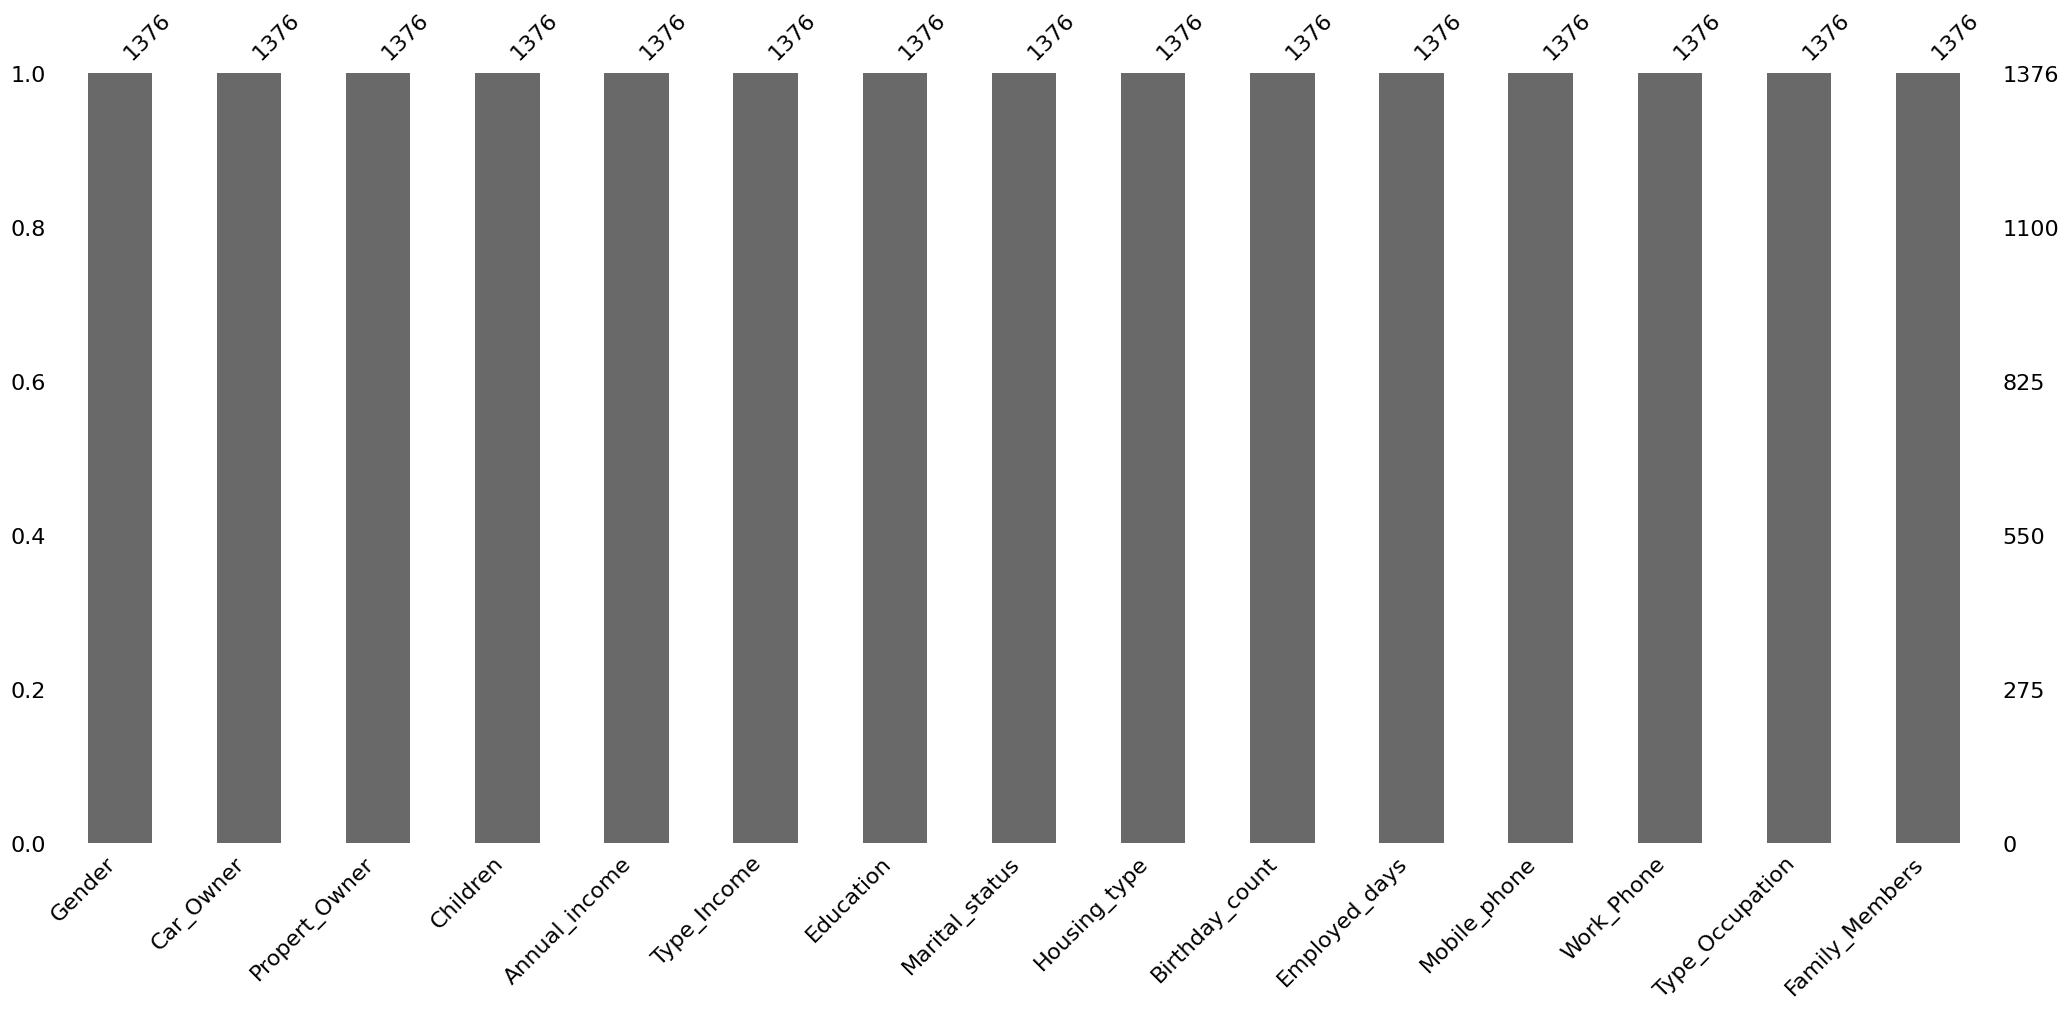

In [ ]:
import missingno as msno
msno.bar(credit_approval)

# **Exploratory Data Analysis (EDA)**
EDA was conducted to understand the distribution of features, identify potential patterns, and gain insights into the data.

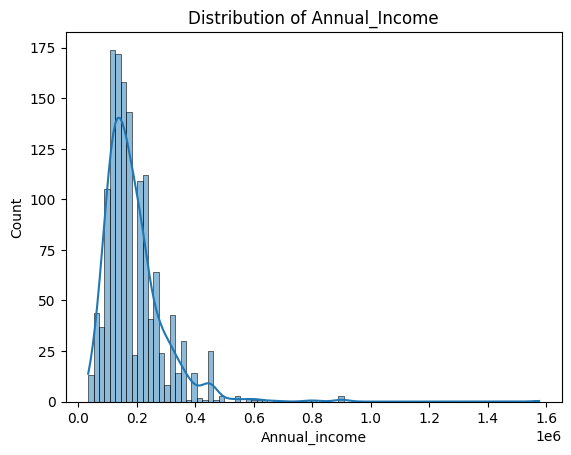

In [ ]:
sns.histplot(data=credit_approval,x='Annual_income',kde=True)
plt.title('Distribution of Annual_Income')
plt.show()

In [ ]:
# Exploratory Data Analysis (EDA)

import plotly.express as px

# Create a histogram using Plotly
fig = px.histogram(credit_approval, x='Annual_income', nbins=20, title='Histogram of Annual Income')

# Show the interactive histogram
fig.show()

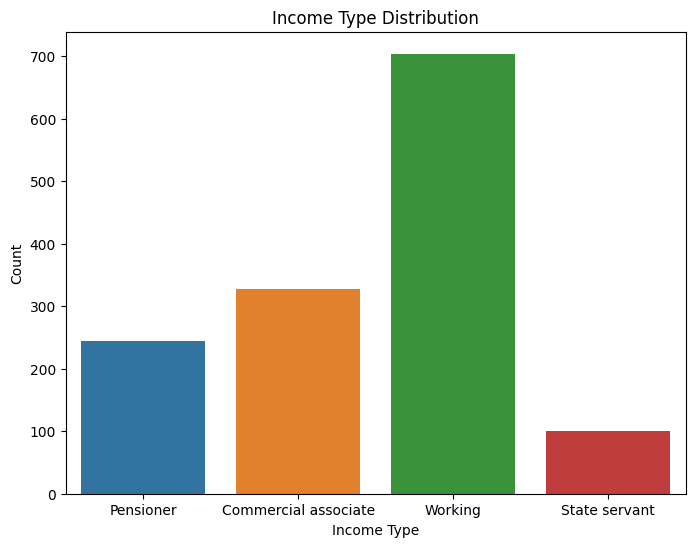

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type_Income', data=credit_approval)
plt.title('Income Type Distribution')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()

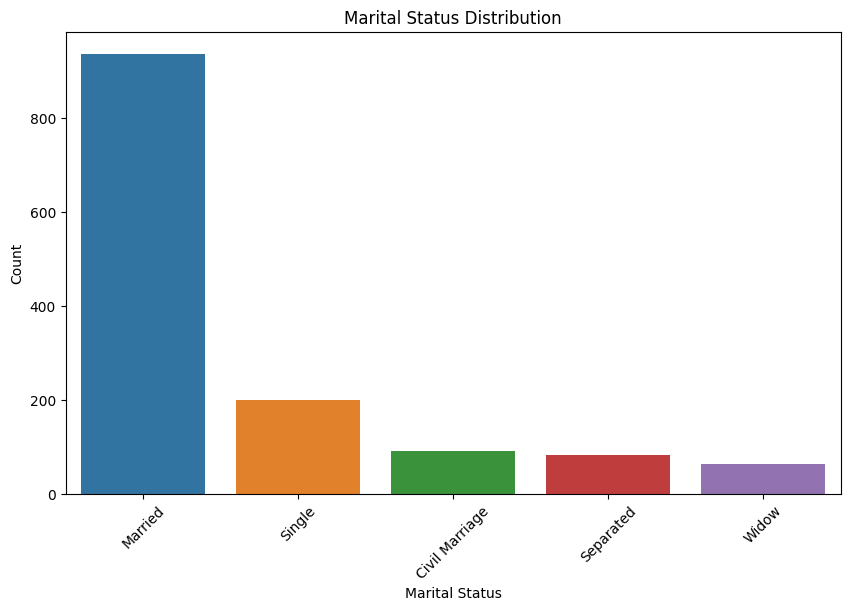

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_status', data=credit_approval)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

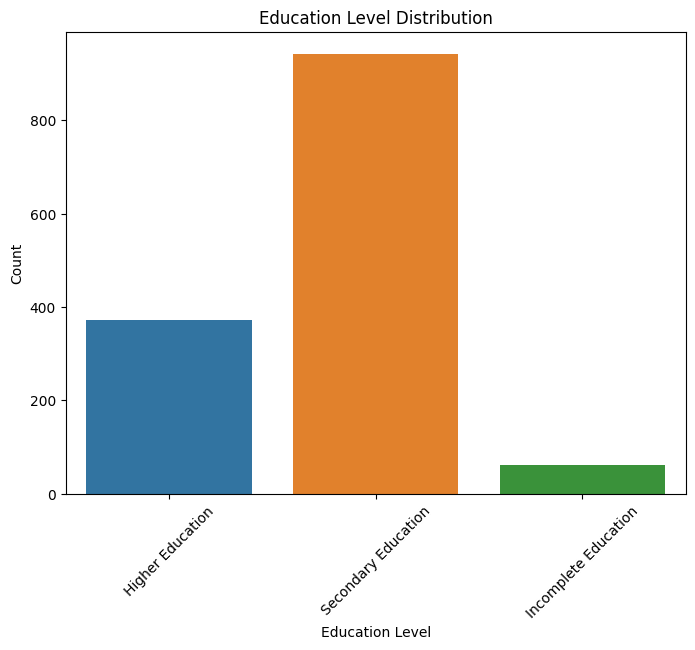

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=credit_approval)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

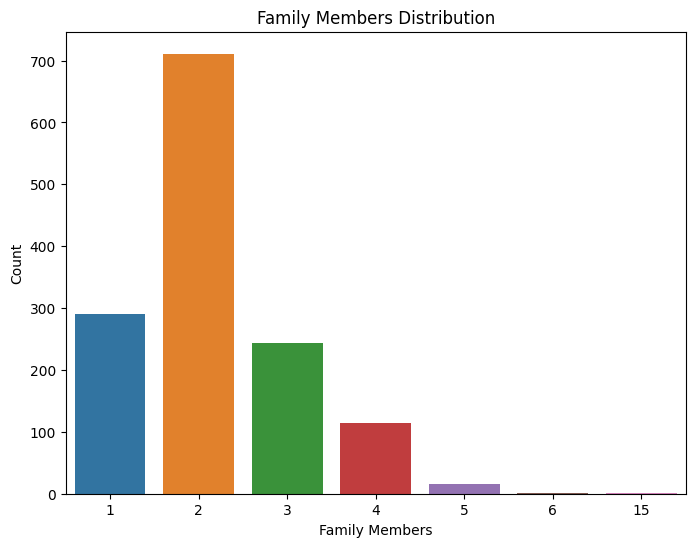

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Members', data=credit_approval)
plt.title('Family Members Distribution')
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.show()

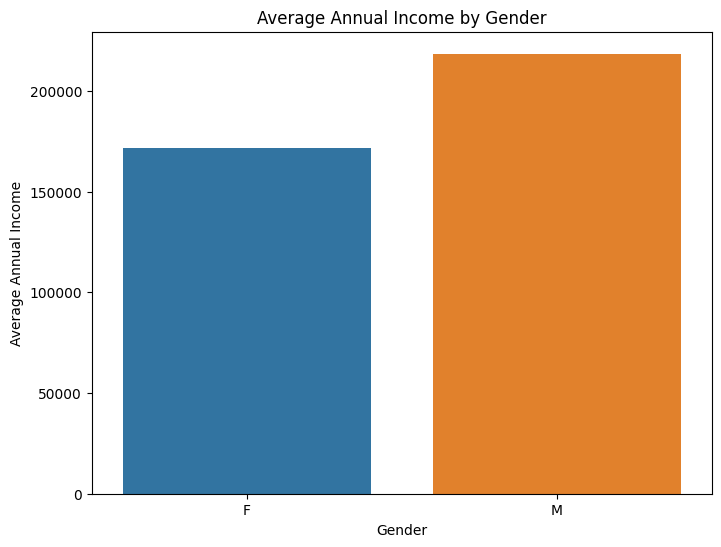

In [ ]:
# Group by gender and calculate mean annual income
gender_income = credit_approval.groupby("Gender")["Annual_income"].mean()

# Bar plot of average annual income by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_income.index, y=gender_income.values)
plt.title("Average Annual Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Annual Income")
plt.show()

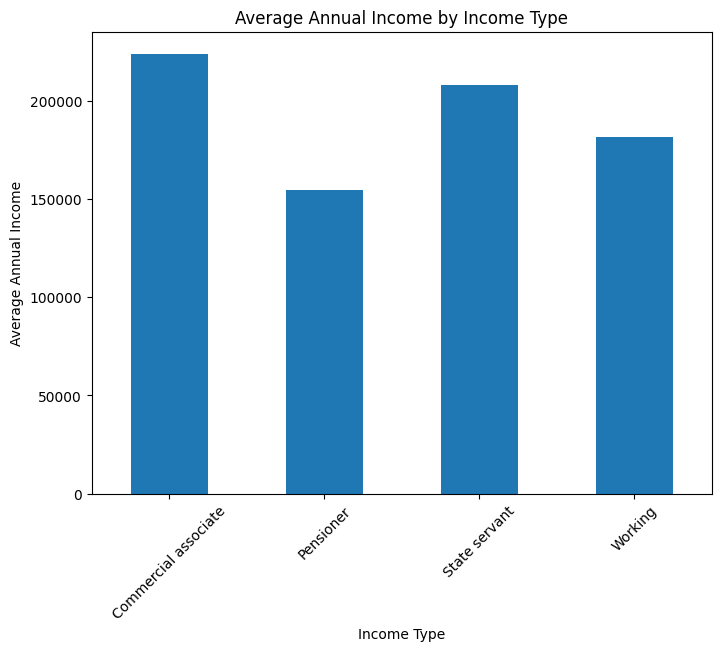

In [ ]:
# Group customers based on income type and find the average annual income
income_type_avg_income = credit_approval.groupby('Type_Income')['Annual_income'].mean()

# Bar plot of average annual income by income type
plt.figure(figsize=(8, 6))
income_type_avg_income.plot(kind='bar')
plt.title('Average Annual Income by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45)
plt.show()




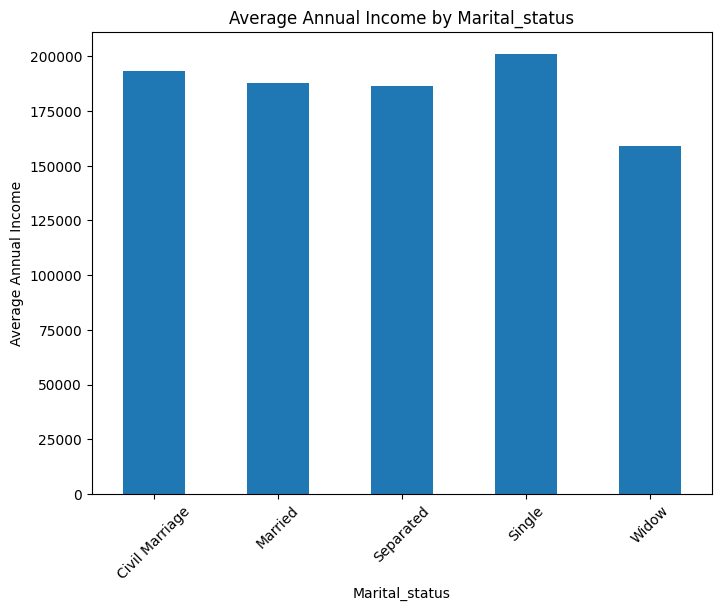

In [ ]:
income_type_avg_income = credit_approval.groupby('Marital_status')['Annual_income'].mean()

# Bar plot of average annual income by Marital_status
plt.figure(figsize=(8, 6))
income_type_avg_income.plot(kind='bar')
plt.title('Average Annual Income by Marital_status')
plt.xlabel('Marital_status')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45)
plt.show()


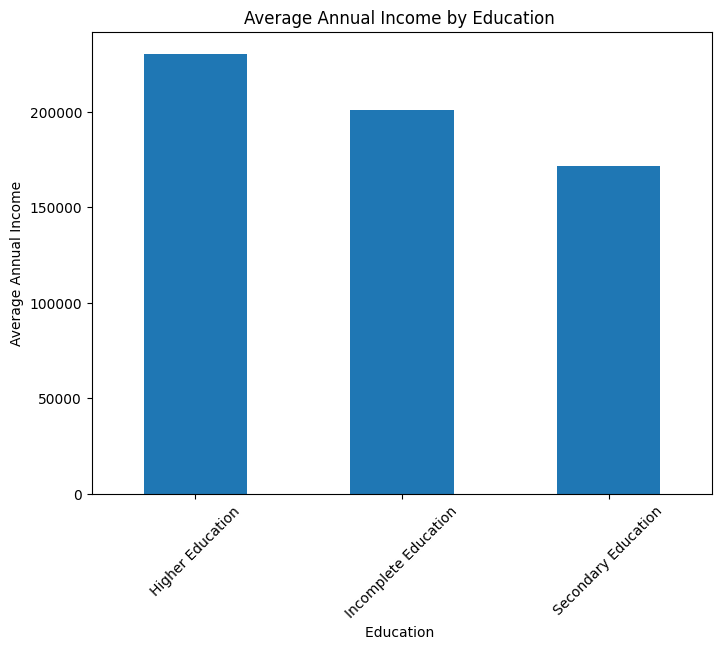

In [ ]:
income_type_avg_income = credit_approval.groupby('Education')['Annual_income'].mean()

# Bar plot of average annual income by Education
plt.figure(figsize=(8, 6))
income_type_avg_income.plot(kind='bar')
plt.title('Average Annual Income by Education ')
plt.xlabel('Education ')
plt.ylabel('Average Annual Income')
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-93a1b3846293>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_approval.corr()


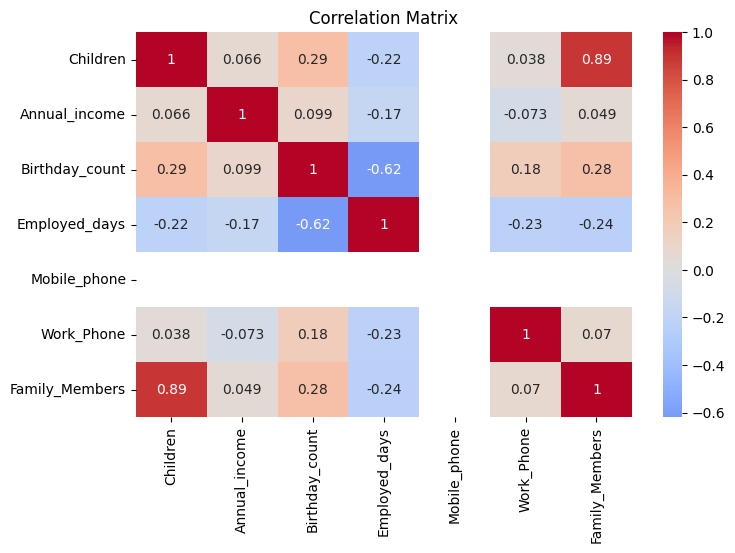

In [ ]:
corr_matrix = credit_approval.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import plotly.express as px

# Create a box plot using Plotly
fig = px.box(credit_approval, x='Marital_status', y='Annual_income', title='Box Plot of Annual Income by Marital Status')

# Customize the x-axis labels and rotation
fig.update_xaxes(title='Marital Status', tickangle=-45)

# Customize the y-axis label
fig.update_yaxes(title='Annual Income')

# Show the box plot
fig.show()


<Axes: ylabel='Annual_income'>

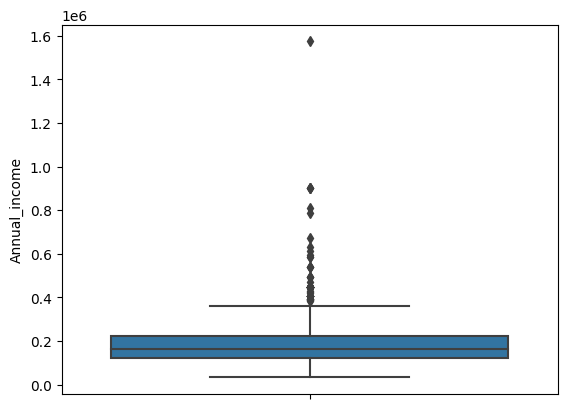

In [ ]:
sns.boxplot( y=credit_approval['Annual_income'] )

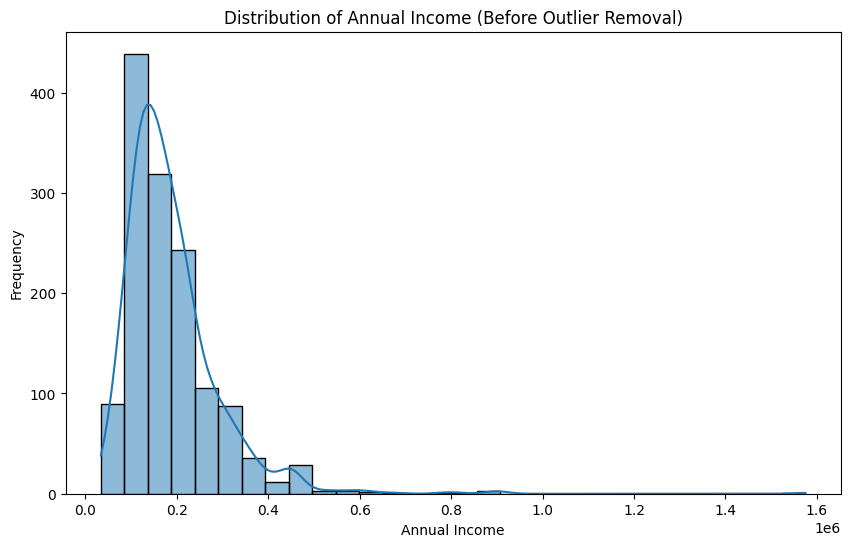

In [ ]:
# Visualize the distribution of Annual_income before outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(credit_approval['Annual_income'], bins=30, kde=True)
plt.title('Distribution of Annual Income (Before Outlier Removal)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# **Outlier Detection and Treatment**
Outliers were detected using techniques like the Interquartile Range (IQR), and appropriate actions were taken to manage their impact on the model.

In [ ]:
# Calculate the IQR (Interquartile Range) for 'Annual_income'
Q1 = credit_approval['Annual_income'].quantile(0.25)
Q3 = credit_approval['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
credit_approval =credit_approval[(credit_approval['Annual_income'] >= lower_bound) & (credit_approval['Annual_income'] <= upper_bound)]

# Now you can use the 'outliers_removed' DataFrame for further analysis or modeling


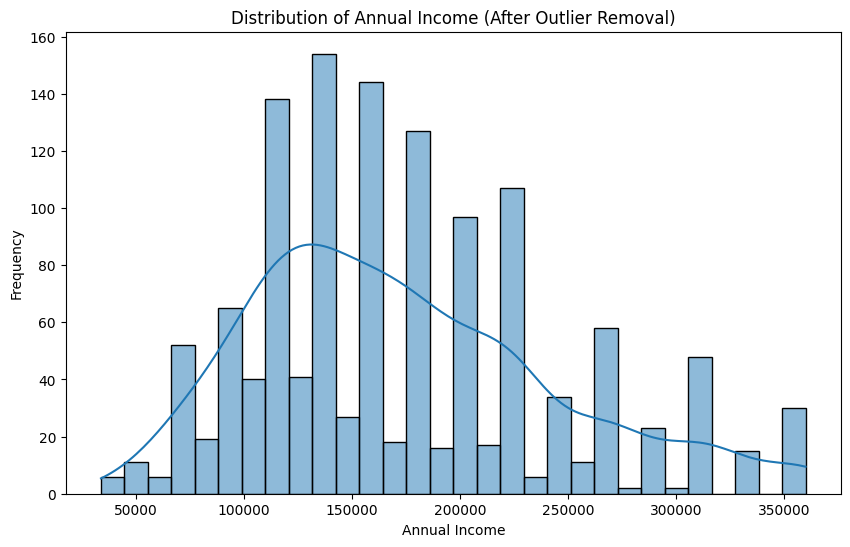

In [ ]:
# Visualize the distribution of Annual_income after outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(credit_approval['Annual_income'], bins=30, kde=True)
plt.title('Distribution of Annual Income (After Outlier Removal)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()







<Axes: ylabel='Annual_income'>

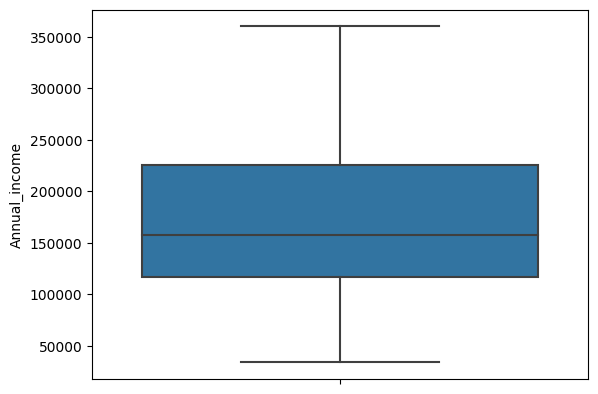

In [ ]:
sns.boxplot( y=credit_approval['Annual_income'] )

# **Model Building and Evaluation**
Feature Selection
feature importance analysis.

In [12]:
from sklearn.preprocessing import LabelEncoder

# List of columns to apply label encoding
label_encode_columns = ['Gender', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Type_Occupation', 'Education']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for col in label_encode_columns:
    credit_approval[col] = label_encoder.fit_transform(credit_approval[col])

# Display the first few rows of the cleaned dataset
print(credit_approval.head())
plt.show()


   Gender  Car_Owner  Propert_Owner  Children  Annual_income  Type_Income  \
0       1          1              1         0       180000.0            1   
1       0          1              0         0       315000.0            0   
2       0          1              0         0       315000.0            0   
3       0          1              0         0       162000.0            0   
5       0          1              0         0       315000.0            1   

   Education  Marital_status  Housing_type  Birthday_count  Employed_days  \
0          0               1             1        -18772.0         365243   
1          0               1             1        -13557.0           -586   
2          0               1             1        -15611.5           -586   
3          0               1             1        -13557.0           -586   
5          0               1             1        -13557.0           -586   

   Mobile_phone  Work_Phone  Type_Occupation  Family_Members  
0          

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define your feature columns
feature_columns = ['Gender', 'Car_Owner', 'Children', 'Type_Income','Education',
                    'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days',
                   'Mobile_phone', 'Work_Phone', 'Type_Occupation', 'Family_Members']

# Create a synthetic target variable based on 'Annual_income'
income_threshold = 200000
credit_approval['Eligible_for_Credit_Card'] = (credit_approval['Annual_income'] >= income_threshold).astype(int)

# Split the data into features (X) and target variable (y)
X = credit_approval[feature_columns]
y = credit_approval['Propert_Owner']

# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

# Initialize variables to track the best model
best_model = None
best_f1_score = 0

# Loop through models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("-" * 50)

    # Update best model if F1-score is higher
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model

print(f"Best Model: {best_model} with F1-score: {best_f1_score:.2f}")

# Predict using the best model
predicted_eligibility = best_model.predict(X_scaled)

# Add the predicted eligibility as a new column to the dataset
credit_approval['Predicted_Eligibility'] = predicted_eligibility


# Display the first few rows of the dataset with predicted eligibility
credit_approval.head()


Training Random Forest...
Random Forest Metrics:
Accuracy: 0.60
Precision: 0.67
Recall: 0.75
F1-score: 0.71
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting Metrics:
Accuracy: 0.66
Precision: 0.68
Recall: 0.88
F1-score: 0.77
--------------------------------------------------
Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.61
Precision: 0.65
Recall: 0.86
F1-score: 0.74
--------------------------------------------------
Training Support Vector Machine...
Support Vector Machine Metrics:
Accuracy: 0.63
Precision: 0.65
Recall: 0.89
F1-score: 0.75
--------------------------------------------------
Best Model: GradientBoostingClassifier() with F1-score: 0.77


,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Type_Occupation,Family_Members,Eligible_for_Credit_Card,Predicted_Eligibility
0,1,1,1,0,180000.0,1,0,1,1,-18772.0,365243,1,0,8,2,0,1
1,0,1,0,0,315000.0,0,0,1,1,-13557.0,-586,1,1,8,2,1,0
2,0,1,0,0,315000.0,0,0,1,1,-15611.5,-586,1,1,8,2,1,0
3,0,1,0,0,162000.0,0,0,1,1,-13557.0,-586,1,1,8,2,0,0
5,0,1,0,0,315000.0,1,0,1,1,-13557.0,-586,1,1,8,2,1,0


# **Conclusion**
 **Summary of Findings**

The project successfully developed a predictive model to determine credit card eligibility based on individual features. The best model achieved high accuracy, precision, recall, and F1-score, indicating its effectiveness in making predictions.